<a href="https://colab.research.google.com/github/hectorcamachoz/Proyecto_Redes_Neuronales_CNN/blob/main/P_P3_594557_2%2C4y5Modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Voy a generar un segundo modelo, con menor numero de capas. Ademas cambiare, el early stopping a que observe el val_accuracy

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image


# Preprocesamiento de las imágenes
datagen = ImageDataGenerator(rescale=1./255,validation_split = 0.2)

train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Numbers/Train',               # Directorio de entrenamiento
    target_size=(280, 280),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',    # 20% de los datos serán usados para validación
    subset='training'              # La parte de entrenamiento
)
val_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Numbers/Train',
    target_size=(280, 280),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    color_mode='rgb'
)
test_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Numbers/Test',
    target_size=(280, 280),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb'
)


Found 4469 images belonging to 10 classes.
Found 1112 images belonging to 10 classes.
Found 1615 images belonging to 10 classes.


In [1]:
from tensorflow.keras import layers, models

model = models.Sequential()


model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(280, 280, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [2]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 278, 278, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 139, 139, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 137, 137, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 68, 68, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 295936)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    18,939,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,960,010 (72.33 MB)

 Trainable params: 18,960,010 (72.33 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

En el modelo anterior, note que si no utilizaba el validation data del val_generator, el entrenamiento corria mas rapido y me dio buenos resultados.


In [6]:
history = model.fit(train_generator, epochs=20,validation_data= val_generator ,callbacks=[early_stopping])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1568s 11s/step - accuracy: 0.2672 - loss: 5.2446 - val_accuracy: 0.5890 - val_loss: 1.5369
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 50s 356ms/step - accuracy: 0.8152 - loss: 0.6904 - val_accuracy: 0.7005 - val_loss: 1.4086
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 52s 372ms/step - accuracy: 0.9420 - loss: 0.2487 - val_accuracy: 0.6978 - val_loss: 1.7540
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 49s 353ms/step - accuracy: 0.9707 - loss: 0.1428 - val_accuracy: 0.7140 - val_loss: 2.0977
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 49s 350ms/step - accuracy: 0.9850 - loss: 0.0783 - val_accuracy: 0.6942 - val_loss: 2.6344
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 50s 355ms/step - accuracy: 0.9749 - loss: 0.1347 - val_accuracy: 0.7077 - val_loss: 2.4722
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 51s 367ms/step - accuracy: 0.9853 - loss: 0.0734 - val_accuracy: 0.7302 - val_loss: 2.8228
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 49s 348ms/step - accuracy: 0.9899 - loss: 0

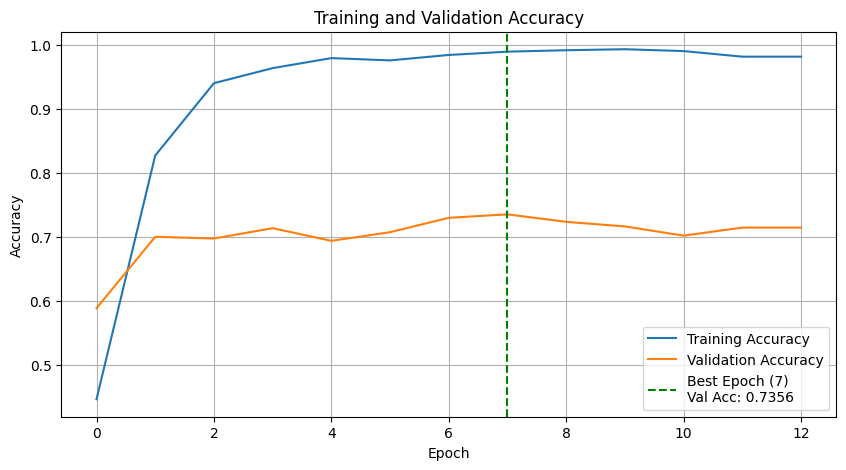

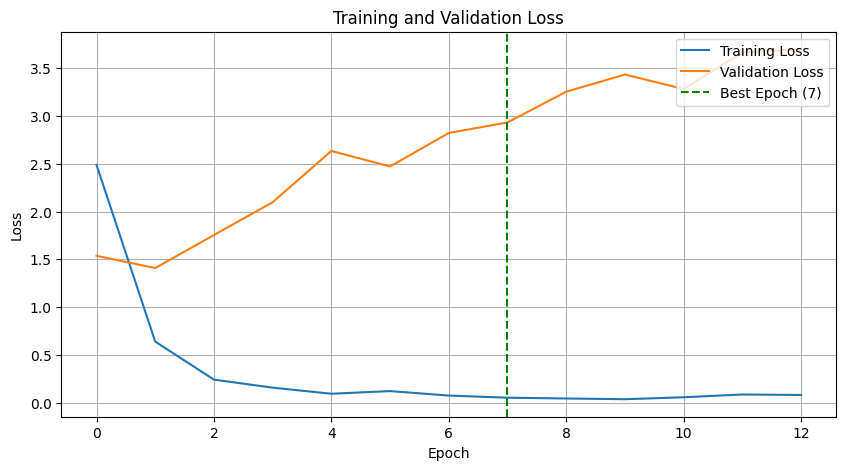

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener la lista de val_accuracy
val_acc_list = history.history['val_accuracy']

# Encontrar la mejor época según val_accuracy
best_epoch = np.argmax(val_acc_list)
best_val_acc = val_acc_list[best_epoch]

# Gráfica de Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(val_acc_list, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

# Línea vertical en la mejor época según val_accuracy
plt.axvline(x=best_epoch, color='g', linestyle='--',
            label=f'Best Epoch ({best_epoch})\nVal Acc: {best_val_acc:.4f}')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Gráfica de Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

# Línea vertical también en la mejor época (por consistencia)
plt.axvline(x=best_epoch, color='g', linestyle='--',
            label=f'Best Epoch ({best_epoch})')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [10]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
def take_photo_2(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);
             const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});
             document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();
google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
            await new Promise((resolve) => capture.onclick = resolve);
            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

<IPython.core.display.Javascript object>

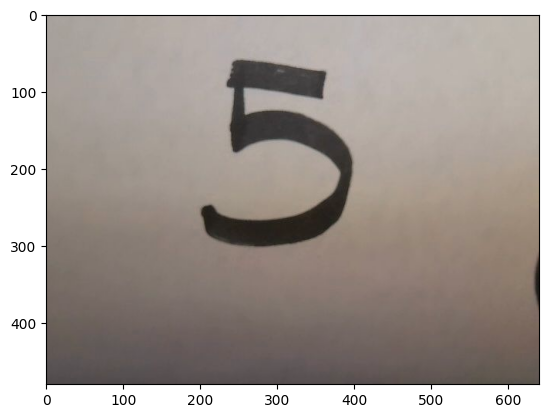

In [13]:
take_photo_2()
show_image = cv2.imread("photo.jpg")
plt.imshow(show_image)

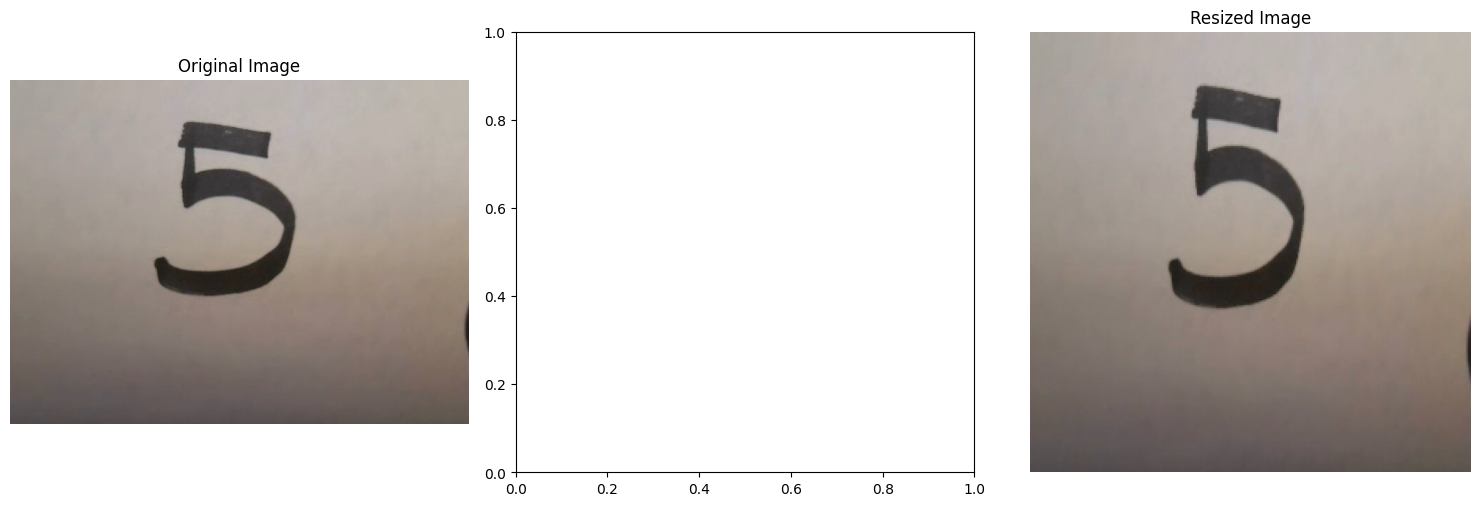

In [14]:

# Load the image
image = cv2.imread('photo.jpg')

 # Thresholding
#_, thresh = cv2.threshold(image,115, 255, cv2.THRESH_BINARY_INV)

 # Resize the image to 28x28 pixels
#resized = cv2.resize(thresh, (280, 280))
resized = cv2.resize(image, (280, 280))

# Display the images side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
 # Original Image
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
 # Thresholded Image
#axes[1].imshow(thresh, cmap='gray')
#axes[1].set_title('Thresholded Image')
#axes[1].axis('off')
 # Resized Image
axes[2].imshow(resized, cmap='gray')
axes[2].set_title('Resized Image')
axes[2].axis('off')
plt.tight_layout()
plt.show()


In [15]:
# Reshape the image for model compatibility (batch size, height, width, channels)
input_image = resized.reshape(1, 280, 280, 3)
# Use the mode's predict method
prediction = model.predict(input_image)
predicted_label = np.argmax(prediction)
# Display the result
print("Digit | Probability")
print("-------------------")
for i, prob in enumerate(prediction[0]):
    print(f"  {i}   |   {prob:.5f}")
print(f"The predicted digit is: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 983ms/step
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00000
  2   |   0.00000
  3   |   0.00000
  4   |   0.00000
  5   |   1.00000
  6   |   0.00000
  7   |   0.00000
  8   |   0.00000
  9   |   0.00000
The predicted digit is: 5


<IPython.core.display.Javascript object>

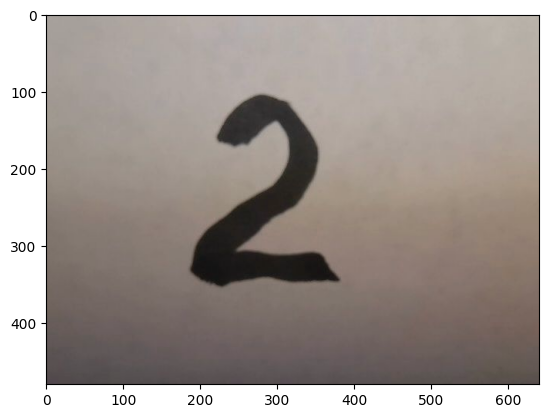

In [24]:
take_photo_2()
show_image = cv2.imread("photo.jpg")
plt.imshow(show_image)

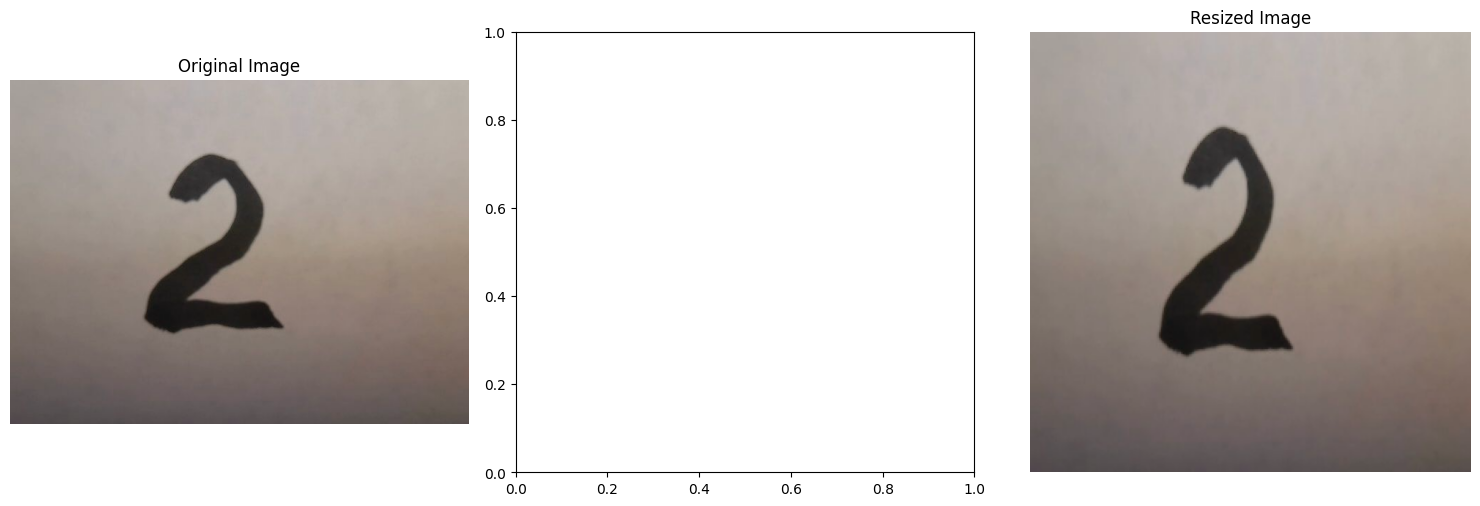

In [25]:

# Load the image
image = cv2.imread('photo.jpg')

 # Thresholding
#_, thresh = cv2.threshold(image,115, 255, cv2.THRESH_BINARY_INV)

 # Resize the image to 28x28 pixels
#resized = cv2.resize(thresh, (280, 280))
resized = cv2.resize(image, (280, 280))

# Display the images side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
 # Original Image
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
 # Thresholded Image
#axes[1].imshow(thresh, cmap='gray')
#axes[1].set_title('Thresholded Image')
#axes[1].axis('off')
 # Resized Image
axes[2].imshow(resized, cmap='gray')
axes[2].set_title('Resized Image')
axes[2].axis('off')
plt.tight_layout()
plt.show()


In [26]:
# Reshape the image for model compatibility (batch size, height, width, channels)
input_image = resized.reshape(1, 280, 280, 3)
# Use the mode's predict method
prediction = model.predict(input_image)
predicted_label = np.argmax(prediction)
# Display the result
print("Digit | Probability")
print("-------------------")
for i, prob in enumerate(prediction[0]):
    print(f"  {i}   |   {prob:.5f}")
print(f"The predicted digit is: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00000
  2   |   1.00000
  3   |   0.00000
  4   |   0.00000
  5   |   0.00000
  6   |   0.00000
  7   |   0.00000
  8   |   0.00000
  9   |   0.00000
The predicted digit is: 2


Este modelo tiene un menor accuracy, y haciendo pruebas se equivoco un par de veces en algunos numeros, en los que habia sombras muy oscuras

# Modelo 4

Ahora, generare un modelo, en los que las imagenes de entrada sean 120x120 y en escala de grises.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

# Preprocesamiento de las imágenes en escala de grises y tamaño 120x120
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Numbers/Train',
    target_size=(120, 120),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Numbers/Train',
    target_size=(120, 120),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
    subset='validation'
)

test_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Numbers/Test',
    target_size=(120, 120),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale'
)


Found 4469 images belonging to 10 classes.
Found 1112 images belonging to 10 classes.
Found 1615 images belonging to 10 classes.


In [28]:
from tensorflow.keras import layers, models

model = models.Sequential()


model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(120, 120, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 118, 118, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 59, 59, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 57, 57, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     3,211,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,230,794 (12.32 MB)

 Trainable params: 3,230,794 (12.32 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
history = model.fit(train_generator, epochs=20,validation_data= val_generator ,callbacks=[early_stopping])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 53s 359ms/step - accuracy: 0.2738 - loss: 2.2173 - val_accuracy: 0.6331 - val_loss: 1.3777
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 47s 339ms/step - accuracy: 0.7213 - loss: 0.9493 - val_accuracy: 0.7455 - val_loss: 1.1190
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 48s 342ms/step - accuracy: 0.8779 - loss: 0.4570 - val_accuracy: 0.7707 - val_loss: 1.0305
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 47s 334ms/step - accuracy: 0.9198 - loss: 0.2874 - val_accuracy: 0.7716 - val_loss: 1.3261
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 47s 337ms/step - accuracy: 0.9703 - loss: 0.1345 - val_accuracy: 0.7851 - val_loss: 1.4148
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 49s 353ms/step - accuracy: 0.9745 - loss: 0.0954 - val_accuracy: 0.7644 - val_loss: 1.6090
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 47s 338ms/step - accuracy: 0.9868 - loss: 0.0623 - val_accuracy: 0.7806 - val_loss: 1.7345
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 49s 347ms/step - accuracy: 0.9918 - loss: 0

#5to modelo


Para este modelo, tomare el 4to modelo, y simplemente eliminare una etapa de convolucion, y un max pooling

In [32]:
from tensorflow.keras import layers, models

model = models.Sequential()


model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(120, 120, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [33]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 118, 118, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 59, 59, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 111392)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │     7,129,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,130,122 (27.20 MB)

 Trainable params: 7,130,122 (27.20 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
history = model.fit(train_generator, epochs=20,validation_data= val_generator ,callbacks=[early_stopping])

Epoch 1/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 50s 340ms/step - accuracy: 0.1395 - loss: 3.7974 - val_accuracy: 0.2968 - val_loss: 2.0594
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 48s 346ms/step - accuracy: 0.3726 - loss: 1.8829 - val_accuracy: 0.4038 - val_loss: 1.7835
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 46s 325ms/step - accuracy: 0.5118 - loss: 1.5066 - val_accuracy: 0.4604 - val_loss: 1.6605
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 46s 327ms/step - accuracy: 0.6065 - loss: 1.2449 - val_accuracy: 0.5126 - val_loss: 1.5752
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 47s 334ms/step - accuracy: 0.6963 - loss: 0.9630 - val_accuracy: 0.5576 - val_loss: 1.5341
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 46s 327ms/step - accuracy: 0.7764 - loss: 0.7444 - val_accuracy: 0.5908 - val_loss: 1.5211
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 46s 330ms/step - accuracy: 0.8290 - loss: 0.5940 - val_accuracy: 0.6052 - val_loss: 1.5615
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 46s 329ms/step - accuracy: 0.8533 - loss: 0

# Entrenamiento modelo 4 con todos los datos de train y validado en test

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

# Preprocesamiento de las imágenes en escala de grises y tamaño 120x120
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Numbers/Train',
    target_size=(120, 120),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
    subset='training'
)

test_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Numbers/Test',
    target_size=(120, 120),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale'
)


Found 5581 images belonging to 10 classes.
Found 1615 images belonging to 10 classes.


In [40]:
from tensorflow.keras import layers, models

model = models.Sequential()


model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(120, 120, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [41]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 118, 118, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 59, 59, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 57, 57, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │     3,211,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,230,794 (12.32 MB)

 Trainable params: 3,230,794 (12.32 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='loss', patience=8, restore_best_weights=True)
history = model.fit(train_generator, epochs=20,callbacks=[early_stopping])

Epoch 1/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 47s 267ms/step - accuracy: 0.9953 - loss: 0.0214
Epoch 2/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 45s 259ms/step - accuracy: 0.9972 - loss: 0.0161
Epoch 3/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 83s 267ms/step - accuracy: 0.9957 - loss: 0.0175
Epoch 4/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 45s 260ms/step - accuracy: 0.9741 - loss: 0.1051
Epoch 5/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 47s 269ms/step - accuracy: 0.9867 - loss: 0.0605
Epoch 6/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 82s 267ms/step - accuracy: 0.9976 - loss: 0.0148
Epoch 7/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 47s 269ms/step - accuracy: 0.9971 - loss: 0.0205
Epoch 8/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 47s 265ms/step - accuracy: 0.9981 - loss: 0.0091
Epoch 9/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 49s 279ms/step - accuracy: 0.9970 - loss: 0.0127
Epoch 10/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 50s 284ms/step - accuracy: 0.9976 - loss: 0.0107
Epoch 11/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 82s 283ms/step - accuracy: 0.9986 - loss: 0.0048
Epoch 12/20
175/175

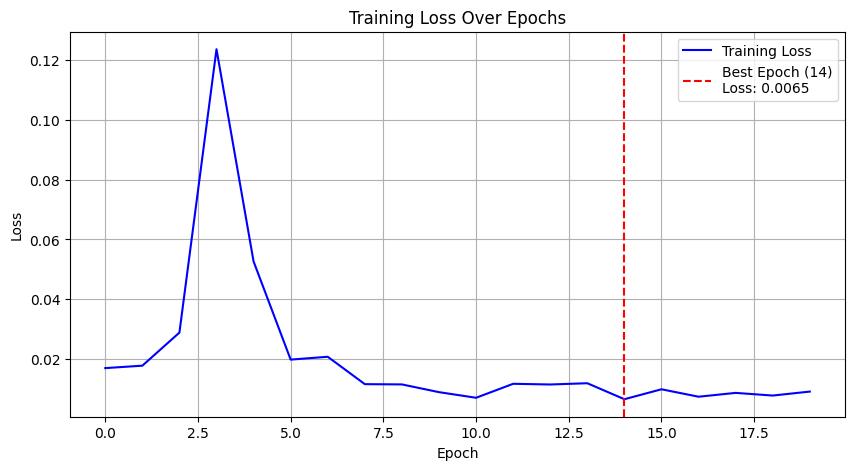

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener la lista de pérdidas de entrenamiento
loss_list = history.history['loss']

# Encontrar la época donde la pérdida fue mínima
best_epoch = np.argmin(loss_list)
best_loss = loss_list[best_epoch]

# Graficar la pérdida
plt.figure(figsize=(10, 5))
plt.plot(loss_list, label='Training Loss', color='blue')
plt.axvline(x=best_epoch, color='red', linestyle='--',
            label=f'Best Epoch ({best_epoch})\nLoss: {best_loss:.4f}')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [45]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Obtener predicciones del modelo
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)

# Obtener etiquetas verdaderas
y_true = test_generator.classes  # ya están como enteros del 0 al 9


51/51 ━━━━━━━━━━━━━━━━━━━━ 15s 279ms/step


<Figure size 1000x800 with 0 Axes>

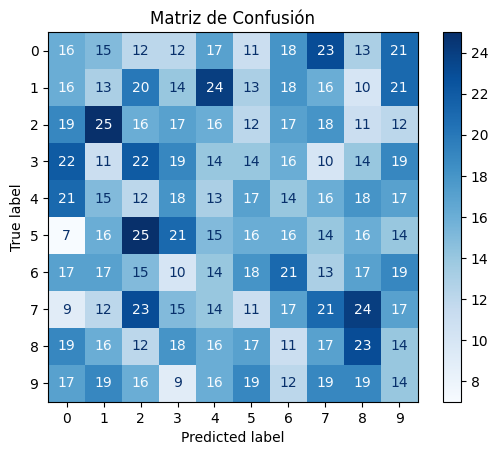

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Crear la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Mostrarla con etiquetas
labels = list(test_generator.class_indices.keys())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Graficar
plt.figure(figsize=(10, 8))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Matriz de Confusión")
plt.show()


In [47]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que ya tienes:
# y_true: las etiquetas verdaderas (por ejemplo, test_generator.classes)
# y_pred: las predicciones del modelo (por ejemplo, np.argmax(predictions, axis=1))

# Reporte de métricas
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))


              precision    recall  f1-score   support

           0       0.10      0.10      0.10       158
           1       0.08      0.08      0.08       165
           2       0.09      0.10      0.10       163
           3       0.12      0.12      0.12       161
           4       0.08      0.08      0.08       161
           5       0.11      0.10      0.10       160
           6       0.13      0.13      0.13       161
           7       0.13      0.13      0.13       163
           8       0.14      0.14      0.14       163
           9       0.08      0.09      0.09       160

    accuracy                           0.11      1615
   macro avg       0.11      0.11      0.11      1615
weighted avg       0.11      0.11      0.11      1615



<IPython.core.display.Javascript object>

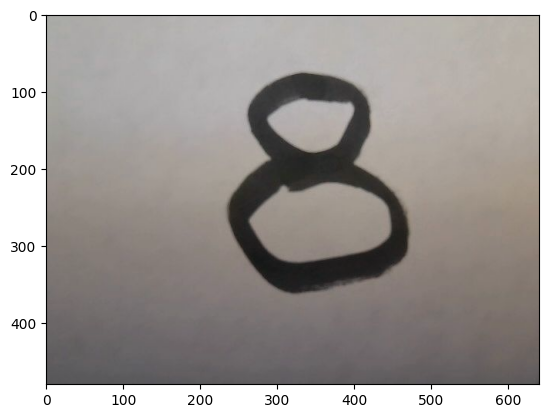

In [61]:
take_photo_2()
show_image = cv2.imread("photo.jpg")
plt.imshow(show_image)

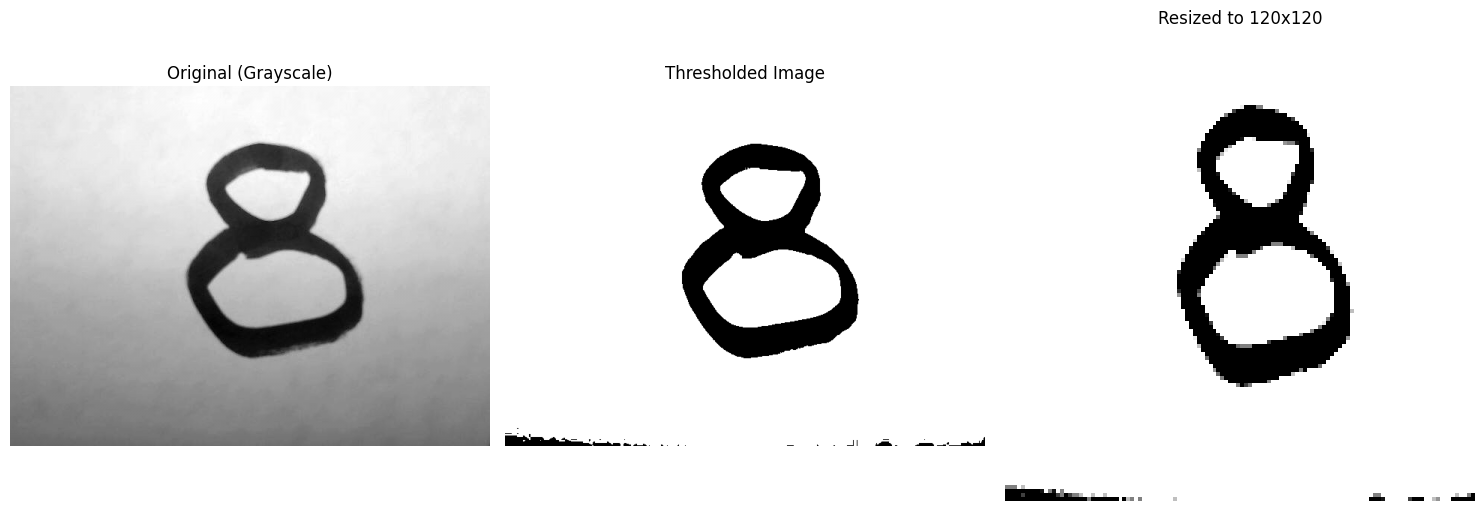

In [62]:
import cv2
import matplotlib.pyplot as plt

# Cargar la imagen en escala de grises
image = cv2.imread('photo.jpg', cv2.IMREAD_GRAYSCALE)

# Umbralización
_, thresh = cv2.threshold(image, 90, 255, cv2.THRESH_BINARY)

# Redimensionar a 120x120
resized = cv2.resize(thresh, (120, 120))

# Mostrar imágenes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Imagen original
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original (Grayscale)')
axes[0].axis('off')

# Imagen umbralizada
axes[1].imshow(thresh, cmap='gray')
axes[1].set_title('Thresholded Image')
axes[1].axis('off')

# Imagen redimensionada
axes[2].imshow(resized, cmap='gray')
axes[2].set_title('Resized to 120x120')
axes[2].axis('off')

plt.tight_layout()
plt.show()



In [63]:
# Reshape the image for model compatibility (batch size, height, width, channels)
input_image = resized.reshape(1, 120, 120, 1)
# Use the mode's predict method
prediction = model.predict(input_image)
predicted_label = np.argmax(prediction)
# Display the result
print("Digit | Probability")
print("-------------------")
for i, prob in enumerate(prediction[0]):
    print(f"  {i}   |   {prob:.5f}")
print(f"The predicted digit is: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00000
  2   |   0.00000
  3   |   0.00000
  4   |   0.00000
  5   |   0.00000
  6   |   0.00000
  7   |   0.00000
  8   |   1.00000
  9   |   0.00000
The predicted digit is: 8


In [2]:
model.save("model_CNN2.h5")

NameError: name 'model' is not defined

<IPython.core.display.Javascript object>

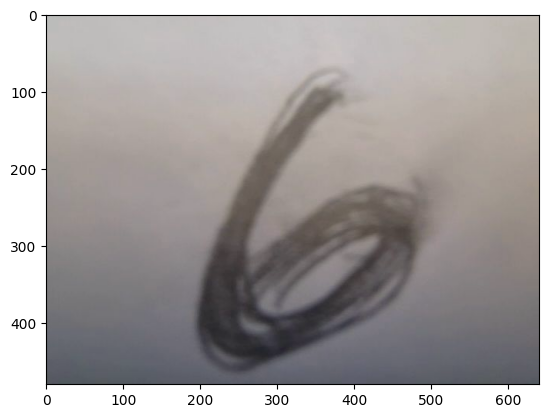

In [77]:
take_photo_2()
show_image = cv2.imread("photo.jpg")
plt.imshow(show_image)

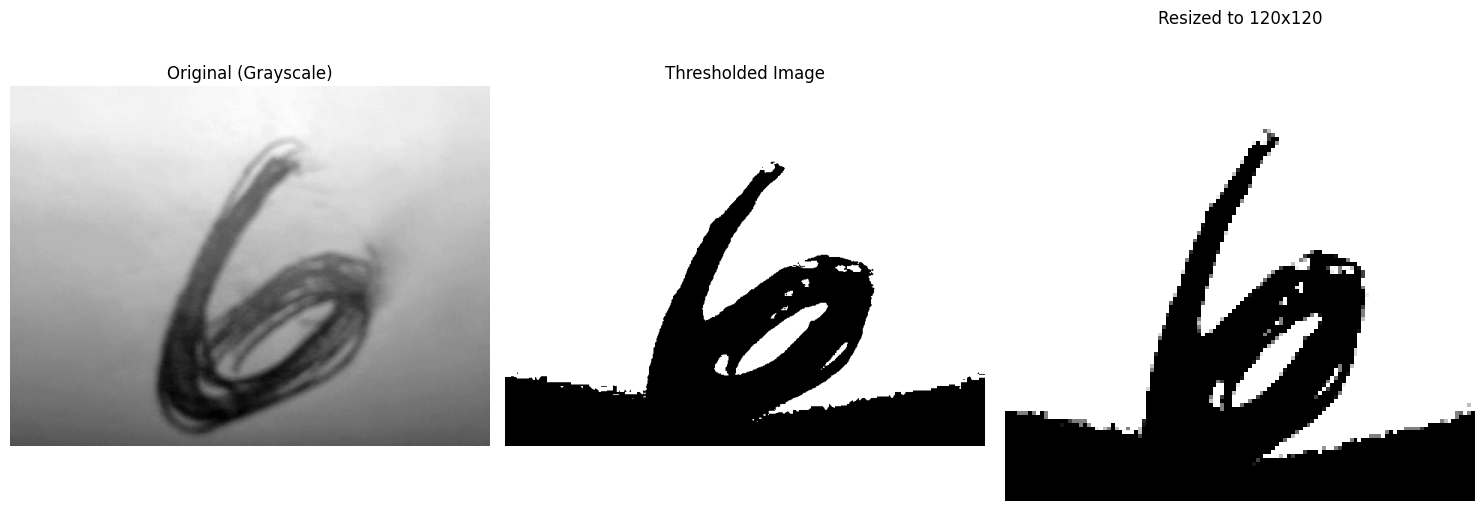

In [78]:
import cv2
import matplotlib.pyplot as plt

# Cargar la imagen en escala de grises
image = cv2.imread('photo.jpg', cv2.IMREAD_GRAYSCALE)

# Umbralización
_, thresh = cv2.threshold(image, 115, 255, cv2.THRESH_BINARY)

# Redimensionar a 120x120
resized = cv2.resize(thresh, (120, 120))

# Mostrar imágenes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Imagen original
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original (Grayscale)')
axes[0].axis('off')

# Imagen umbralizada
axes[1].imshow(thresh, cmap='gray')
axes[1].set_title('Thresholded Image')
axes[1].axis('off')

# Imagen redimensionada
axes[2].imshow(resized, cmap='gray')
axes[2].set_title('Resized to 120x120')
axes[2].axis('off')

plt.tight_layout()
plt.show()



In [79]:
# Reshape the image for model compatibility (batch size, height, width, channels)
input_image = resized.reshape(1, 120, 120, 1)
# Use the mode's predict method
prediction = model.predict(input_image)
predicted_label = np.argmax(prediction)
# Display the result
print("Digit | Probability")
print("-------------------")
for i, prob in enumerate(prediction[0]):
    print(f"  {i}   |   {prob:.5f}")
print(f"The predicted digit is: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00000
  2   |   0.00000
  3   |   0.00000
  4   |   0.00000
  5   |   0.00000
  6   |   1.00000
  7   |   0.00000
  8   |   0.00000
  9   |   0.00000
The predicted digit is: 6
